In [2]:
# Import necessary libraries
from train import load_and_tokenize_data
from imblearn.over_sampling import SMOTE
import numpy as np
from collections import defaultdict
from datasets import Dataset
import matplotlib.pyplot as plt


In [3]:
# Load and tokenize data
dataset, label_names = load_and_tokenize_data()

# Extract training dataset
training_dataset = dataset["train"]
sentences = training_dataset["ner_tags"]
counting = defaultdict(int)
arr_of_number_of_entities = []
arr_of_number_of_non_entities = []


In [4]:
# Count entities and non-entities
for sentence in sentences:
    number_of_entities = 0
    number_of_non_entities = 0
    for ner_tag in sentence:
        counting[label_names[ner_tag]] += 1
        if label_names[ner_tag] == "O":
            number_of_non_entities += 1
        else:
            number_of_entities += 1
    arr_of_number_of_entities.append(number_of_entities)
    arr_of_number_of_non_entities.append(number_of_non_entities)


In [5]:
# Calculate total entities
total_entities = sum(count for label, count in counting.items() if label != "O")


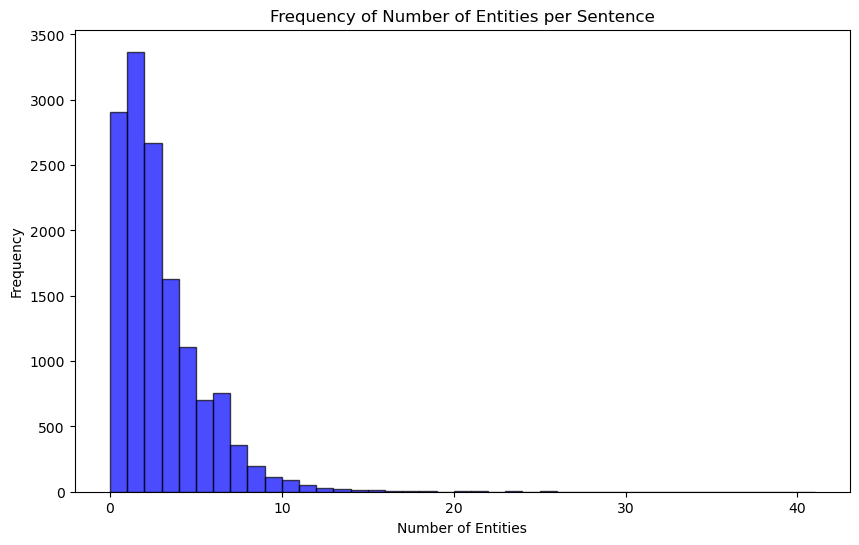

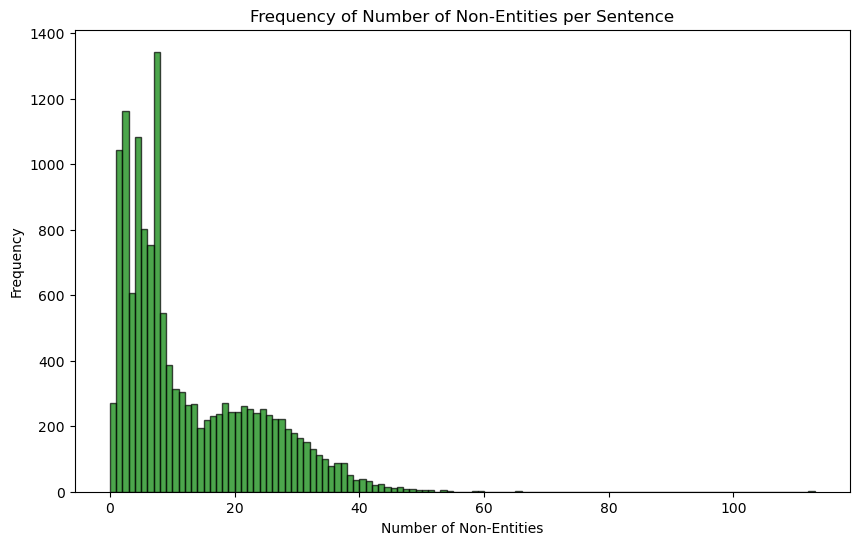

In [6]:
# Plot histograms
plt.figure(figsize=(10, 6))
plt.hist(arr_of_number_of_entities, bins=range(min(arr_of_number_of_entities), max(arr_of_number_of_entities) + 2), color='blue', alpha=0.7, edgecolor='black')
plt.title("Frequency of Number of Entities per Sentence")
plt.xlabel("Number of Entities")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(arr_of_number_of_non_entities, bins=range(min(arr_of_number_of_non_entities), max(arr_of_number_of_non_entities) + 2), color='green', alpha=0.7, edgecolor='black')
plt.title("Frequency of Number of Non-Entities per Sentence")
plt.xlabel("Number of Non-Entities")
plt.ylabel("Frequency")
plt.show()


In [7]:
# Function to draw pie chart
def draw_pie_chart():
    total = total_entities + counting[label_names[0]]
    size = [total_entities / total, counting[label_names[0]] / total]
    label = ['Entity', 'Non-entity']
    color = ['lightblue', 'red']
    plt.pie(size, explode=(0.1, 0), labels=label, colors=color, autopct='%1.1f%%')
    plt.show()


In [8]:
# Function to filter dataset
def filter_dataset(k, dataset: Dataset):
    filtered = dataset.filter(lambda data: len(data["ner_tags"]) - data["ner_tags"].count(0) >= k)
    return filtered


In [9]:
# Function to find sentence ratio
def find_sentence_ratio(sentence: list):
    entity, non_entity = 0, 0
    for x in sentence:
        if x == 0:
            non_entity += 1
        else:
            entity += 1
    return entity / (entity + non_entity)


In [10]:
# Function to find dataset mean ratio
def find_dataset_mean_ratio(sentences): 
    arr_of_ratios = []
    for sentence in sentences:
        entity_ratio = find_sentence_ratio(sentence)    
        arr_of_ratios.append(entity_ratio)
    return np.mean(arr_of_ratios) 


In [11]:
# Function to plot pie chart for filtered dataset
def plot_pie_chart(k):
    filtered_dataset = filter_dataset(k, training_dataset)
    filtered_sentences = filtered_dataset["ner_tags"]
    counting = defaultdict(int)
    for sentence in filtered_sentences:
        for ner_tag in sentence:
            counting[label_names[ner_tag]] += 1
    total_entities = sum(count for label, count in counting.items() if label != "O")
    total_non_entities = counting["O"]
    total = total_entities + total_non_entities
    size = [total_entities / total, total_non_entities / total]
    label = ['Entity', 'Non-entity']
    color = ['lightblue', 'red']
    plt.figure(figsize=(8, 8))
    plt.pie(size, explode=(0.1, 0), labels=label, colors=color, autopct='%1.1f%%', startangle=140)
    plt.title(f"Entity vs Non-Entity Distribution for k={k}")
    plt.show()


In [12]:
# Define the predicted logits (before softmax) for 2 tokens and 9 classes
logits = np.array([[1.0, 2.0, 0.1, 0.2, 0.3, 0.0, 0.0, 0.5, 0.6],  # Token 1
                   [0.5, 1.0, 0.0, 1.5, 0.1, 0.6, 0.0, 0.0, 0.4]]) # Token 2

# Define the ground truth (one-hot encoded)
ground_truth = np.array([[0, 1, 0, 0, 0, 0, 0, 0, 0],  # "John" is B-PER
                          [1, 0, 0, 0, 0, 0, 0, 0, 0]]) # "is" is O

# Step 1: Apply softmax to logits
logits_tensor = tf.constant(logits, dtype=tf.float32)
softmax_probs = tf.nn.softmax(logits_tensor)

# Step 2: Clip the softmax probabilities
epsilon = 1e-6
y_pred = tf.clip_by_value(softmax_probs, epsilon, 1.0 - epsilon)

# Step 3: Calculate intersection
y_true = tf.constant(ground_truth, dtype=tf.float32)
intersection = tf.reduce_sum(y_true * y_pred, axis=0)

# Step 4: Calculate total
total = tf.reduce_sum(y_true + y_pred, axis=0)

# Step 5: Compute Dice coefficient
dice_coefficient = (2. * intersection) / (total + epsilon)

# Step 6: Calculate Dice loss
dice_loss = 1 - tf.reduce_mean(dice_coefficient)

# Print the results
print("Softmax Probabilities:\n", softmax_probs.numpy())
print("Intersection:\n", intersection.numpy())
print("Total:\n", total.numpy())
print("Dice Coefficient:\n", dice_coefficient.numpy())
print("Dice Loss:\n", dice_loss.numpy())

NameError: name 'tf' is not defined

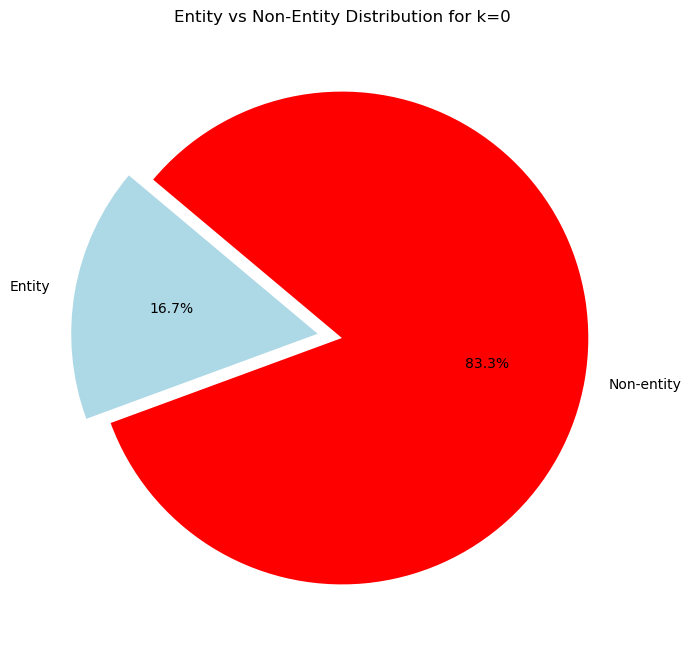

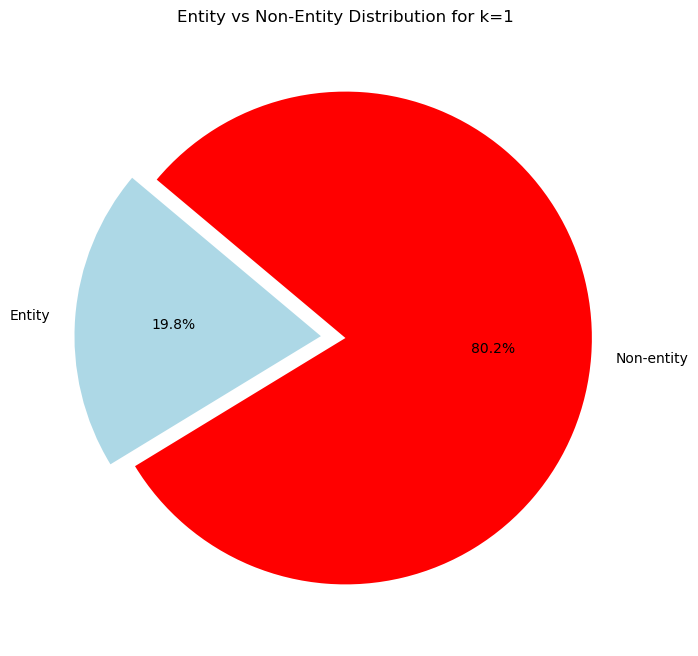

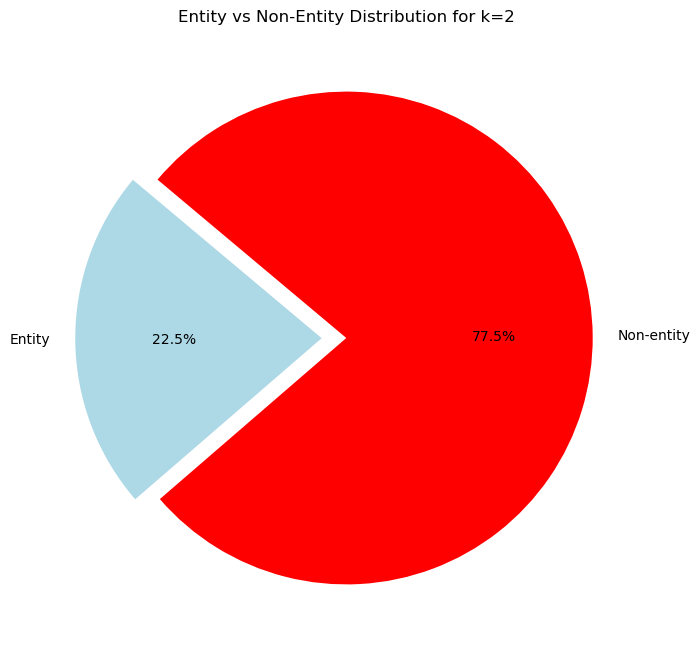

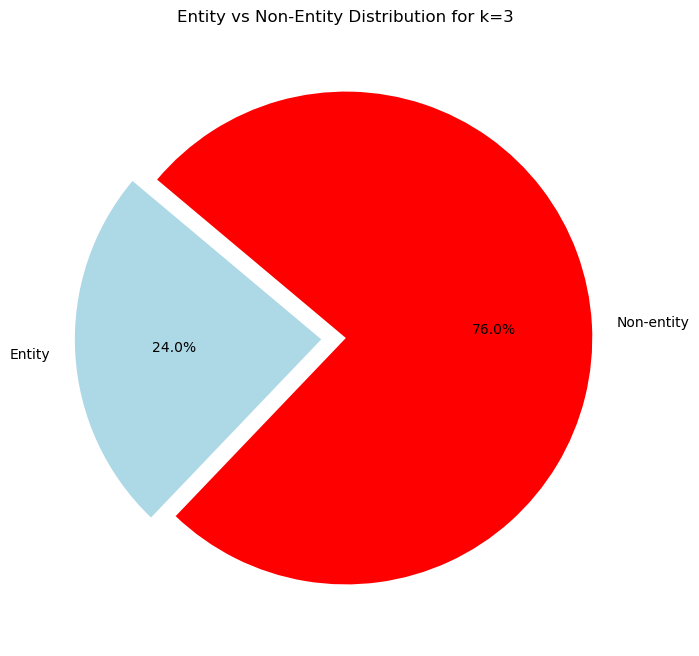

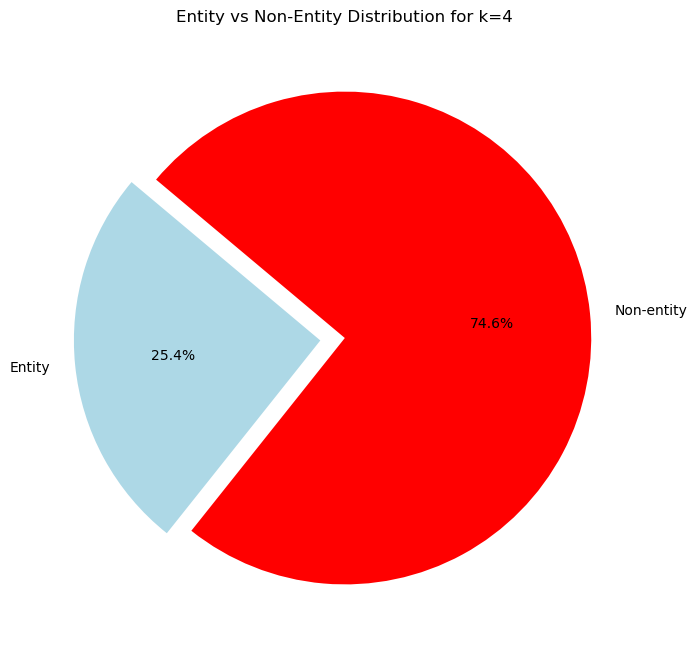

In [ ]:
# Generate pie charts for k in range
for k in range(0, 5):
    plot_pie_chart(k)
